# TMDb Movies Data Analysis
## By Daniel Jing

### This dataset contains information about 10,000 movies collected from The Movie Database (TMDb). The aim of this analysis is to find out how revenue is related to some numeric varibles such as budget, popularity and runtime, and how vote_count relates to the profitability, namely the revenue.
### The dataset is collected, reorganized and offered by Kaggle.  
### Sourcing: https://www.kaggle.com/tmdb/tmdb-movie-metadata

#### Importing libraries and Reading the file

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Generating basic statistics of the data set

In [3]:
df.shape

(10866, 21)

In [4]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Data wrangling: Removing irrelevant columns and null cells
Since there are 2 columns for budget and revenue, we will use the adjusted ones for each, namely the ones with '_adj' ending.

In [6]:
df.drop(['id','budget','revenue','original_title','cast','homepage','director','tagline','overview','production_companies','release_date','release_year'], axis=1, inplace=True)

In [7]:
df.isnull().any().any(), df.shape

(True, (10866, 9))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
imdb_id         10856 non-null object
popularity      10866 non-null float64
keywords        9373 non-null object
runtime         10866 non-null int64
genres          10843 non-null object
vote_count      10866 non-null int64
vote_average    10866 non-null float64
budget_adj      10866 non-null float64
revenue_adj     10866 non-null float64
dtypes: float64(4), int64(2), object(3)
memory usage: 764.1+ KB


In [9]:
rows = df.shape[0]
df = df.dropna()

In [10]:
df.isnull().any().any(), df.shape

(False, (9364, 9))

In [11]:
rows - df.shape[0]

1502

In [12]:
df.head()

,imdb_id,popularity,keywords,runtime,genres,vote_count,vote_average,budget_adj,revenue_adj
0,tt0369610,32.985763,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,1.379999e+08,1.392446e+09
1,tt1392190,28.419936,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,1.379999e+08,3.481613e+08
2,tt2908446,13.112507,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,2480,6.3,1.012000e+08,2.716190e+08
3,tt2488496,11.173104,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,1.839999e+08,1.902723e+09
4,tt2820852,9.335014,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,2947,7.3,1.747999e+08,1.385749e+09


In [13]:
df.describe()

,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,9364.000000,9364.000000,9364.000000,9364.000000,9.364000e+03,9.364000e+03
mean,0.704639,103.166062,246.288125,6.005756,1.980117e+07,5.892768e+07
std,1.060938,28.669300,614.341565,0.912214,3.611042e+07,1.541315e+08
min,0.000188,0.000000,10.000000,1.500000,0.000000e+00,0.000000e+00
25%,0.228793,91.000000,19.000000,5.400000,0.000000e+00,0.000000e+00
50%,0.420735,100.000000,47.000000,6.100000,4.587565e+05,0.000000e+00
75%,0.787349,113.000000,180.000000,6.600000,2.541274e+07,4.598667e+07
max,32.985763,900.000000,9767.000000,9.200000,4.250000e+08,2.827124e+09


#### Data visualization

Text(0, 0.5, 'Number of movies')

<Figure size 1058.4x595.44 with 0 Axes>

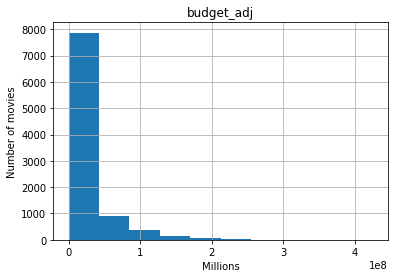

In [14]:
#Displaying histograms of budget
plt.figure(figsize = [14.70,8.27])
df.hist('budget_adj')
plt.xlabel('Millions')
plt.ylabel('Number of movies')

Text(0, 0.5, 'Number of movies')

<Figure size 1058.4x595.44 with 0 Axes>

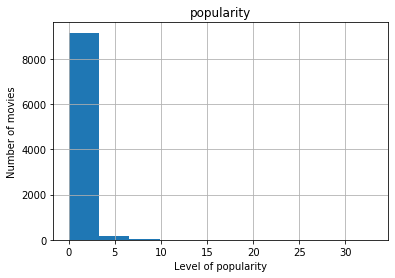

In [15]:
#Displaying histograms of popularity
plt.figure(figsize = [14.70,8.27])
df.hist('popularity')
plt.xlabel('Level of popularity')
plt.ylabel('Number of movies')

Text(0, 0.5, 'Number of movies')

<Figure size 1058.4x595.44 with 0 Axes>

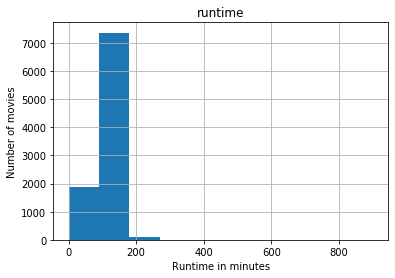

In [16]:
#Displaying histograms of runtime
plt.figure(figsize = [14.70,8.27])
df.hist('runtime')
plt.xlabel('Runtime in minutes')
plt.ylabel('Number of movies')

In [17]:
def sort_by_budget(df):
    return df.sort_values(by = 'budget_adj', ascending = False)['original_title'].head(1)

In [18]:
def sort_by_revenue(df):
    return df.sort_values(by = 'revenue_adj', ascending = False)['original_title'].head(1)

In [19]:
# Creat a list could affect revenue
revenueFactors = ['budget_adj', 'popularity', 'runtime', 'vote_count']

In [20]:
# check how the factors are correlated with revenue
for f in revenueFactors:
    related = df['revenue_adj'].corr(df[f])
    print("%s: %f" % (f,related))

budget_adj: 0.640750
popularity: 0.603221
runtime: 0.193925
vote_count: 0.703603


Text(0.5, 1.0, 'vote_average vs. revenue_adj')

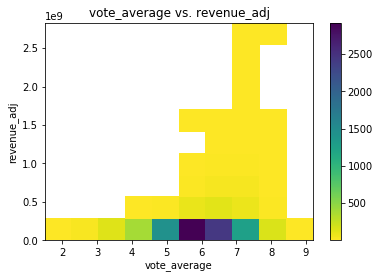

In [21]:
plt.hist2d(data=df, x='vote_average', y='revenue_adj', cmap = 'viridis_r', cmin = 0.5);
plt.colorbar()

plt.xlabel('vote_average')
plt.ylabel('revenue_adj')
plt.title('vote_average vs. revenue_adj')

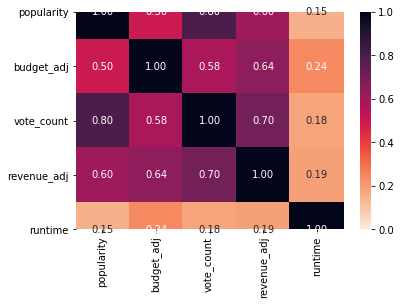

In [22]:
# check how the factors are correlated with each other
movie_stats = ['popularity', 'budget_adj', 'vote_count', 'revenue_adj', 'runtime']
sns.heatmap(df[movie_stats].corr(), annot = True, cmap = 'rocket_r', fmt = '.2f', vmin = 0)

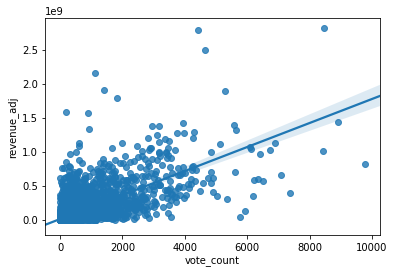

In [23]:
#Displaying scatterplot of 'vote_count' with regression line
sns.regplot(data = df, x = 'vote_count', y = 'revenue_adj')

#### Final statistics of how the selected factors relate to revenue

In [24]:
df['intercept'] = 1

lm = sm.OLS(df['revenue_adj'], df[['budget_adj', 'popularity', 'runtime', 'vote_count']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            revenue_adj   R-squared (uncentered):                   0.632
Model:                            OLS   Adj. R-squared (uncentered):              0.631
Method:                 Least Squares   F-statistic:                              4011.
Date:                Sun, 05 Jan 2020   Prob (F-statistic):                        0.00
Time:                        09:53:36   Log-Likelihood:                     -1.8579e+05
No. Observations:                9364   AIC:                                  3.716e+05
Df Residuals:                    9360   BIC:                                  3.716e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
budget_adj     1.4669      0.036     40.953      0.000       1.397       1.537
popularity  1.018e+07   1.61e+06      6.319      0.000    7.02e+06    1.33e+07
runtime    -3.639e+04   1.25e+04     -2.921      0.004   -6.08e+04    -1.2e+04
vote_count  1.119e+05   2967.379     37.710      0.000    1.06e+05    1.18e+05
==============================================================================
Omnibus:                    11170.210   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3057870.093
Skew:                           6.034   Prob(JB):                         0.00
Kurtosis:                      90.702   Cond. No.                     6.41e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Conclusions
### Finally, based on the analysis and visualizations above, we can draw our conclusion that the revenue of movies from the dataset is highly correlated to budget and popularity, but not so much to runtime. Vote_count has positive correlation with profitability as well.
### Due to the limitation of the sample size of the dataset, we cannot say this is fully represented the situation of the population. Since some of the varibles are categorical ones, so only descriptive statistics are implemented but not inferential statistics.